In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading libraries from SK-Learn.......
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Loading Ensemble Libraries...
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Model selection libraries.....
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.....
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings....
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import scikit learn databases
from sklearn import datasets
# import california housing data from sklearn and store data into a variable
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [3]:
# Creating a Data Frame and putting the Feature Names...
headers = calihouses.feature_names
df=pd.DataFrame(data=calidata,columns=headers)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
# setting up the target variable...
target = calihouses.target
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
# Combining the target value in the DataFrame....
df['Target']=target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
# Description of the datasest....
calihouses.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

## Understanding Data

1) Features/Attributes:
   >> 1. Longitude: A measure of how far west a house is; a higher value is farther west
   >> 2. Latitude: A measure of how far north a house is; a higher value is farther north
   >> 3. HouseAge: Median age of a house within a block
   >> 4. AveRooms: Total number of rooms within a block
   >> 5. AveBedrms: Total number of bedrooms within a block
   >> 6. Population: Total number of people residing within a block
   >> 7. AveOccup: average house occupancy           
   >> 8. MedInc: Median income  in block
   
2) Target/Label:
   >>  Target: Median house value for California districts
   
3) We have to predict the median_house_value which is a continuous data, thus using Regression models for evaluation.

# EDA (Exploratory Data Analysis)

In [7]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 20640 rows and 10 columns.
df.shape

(20640, 9)

In [8]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [9]:
# Checking last few rows...
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [10]:
# Checking Columns...
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [11]:
# Checking Data Types...
df.dtypes
#  1 object data type, rest are float64 data types

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object

In [12]:
# # Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in MedInc are 12928 
Number of unique values in HouseAge are 52 
Number of unique values in AveRooms are 19392 
Number of unique values in AveBedrms are 14233 
Number of unique values in Population are 3888 
Number of unique values in AveOccup are 18841 
Number of unique values in Latitude are 862 
Number of unique values in Longitude are 844 
Number of unique values in Target are 3842 


In [13]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
Target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


Features Information:             
1) No null data.                
2) float datatype= 9              

In [14]:
# Statistical Features Information......
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


##### Mean is greater than the Median thus we can say that data is right skewed

In [15]:
# Checking the correlation.....
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


#####  From Correlation table:                   
1) AveBdrms, Population, Aveoccup,Lattitude, Longitude are negatively correlated with the Target.                     
2) MedInc, HouseAge,AveRooms, are positively correlated with the Target, but MedInc is strongly correlated.         

## Univariant Analysis...

MedInc           AxesSubplot(0.125,0.657941;0.227941x0.222059)
HouseAge      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
AveRooms      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
AveBedrms        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Population    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
AveOccup      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Latitude            AxesSubplot(0.125,0.125;0.227941x0.222059)
Longitude        AxesSubplot(0.398529,0.125;0.227941x0.222059)
Target           AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

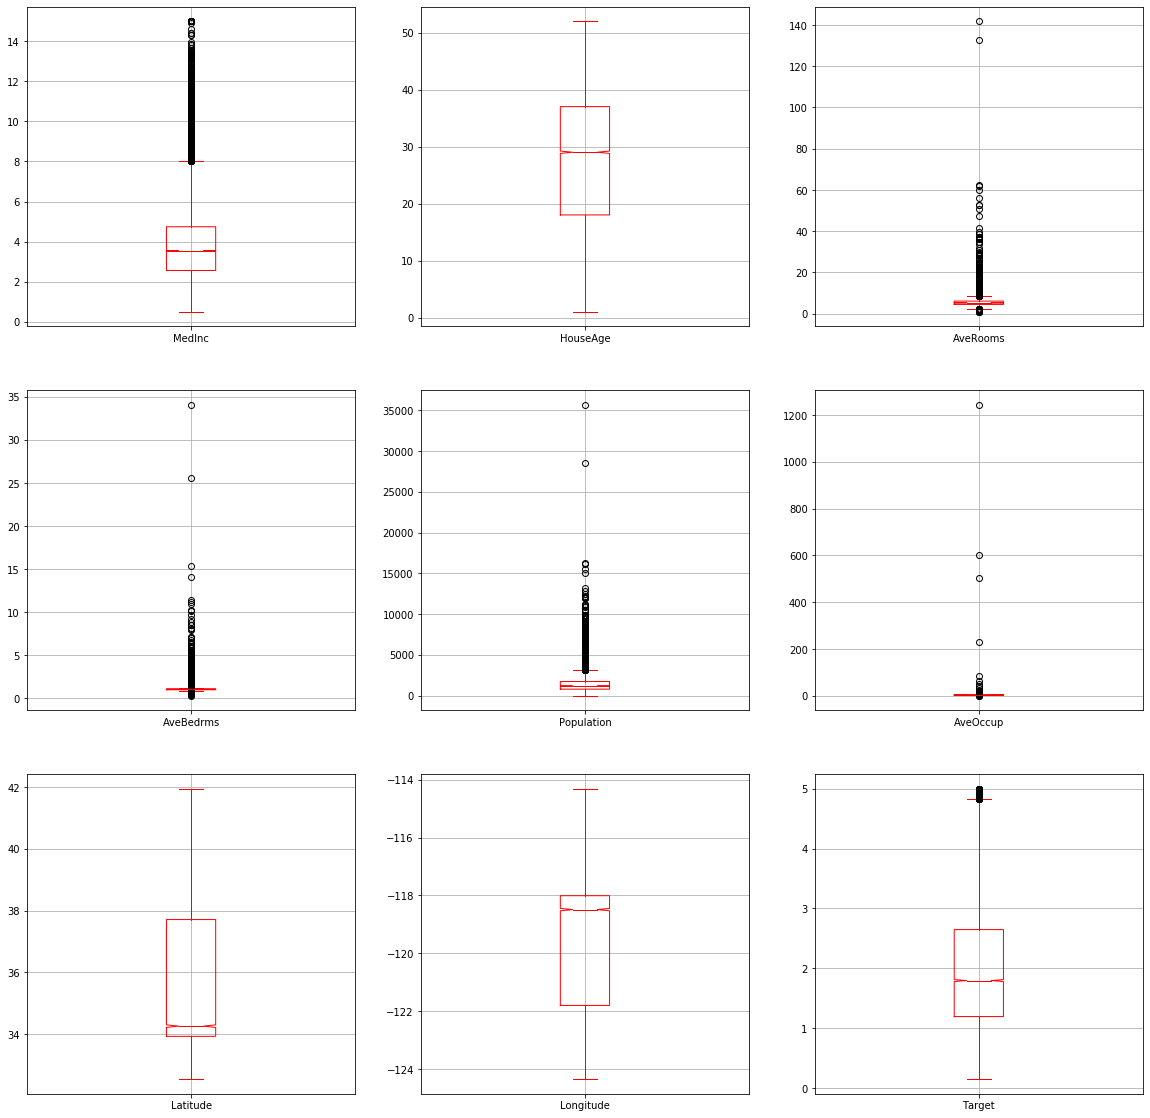

In [16]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

##### MedInc, AveRooms, AveBedrms, Population, Aveoccup have outliers....

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C37E105C08>,
      dtype=object)

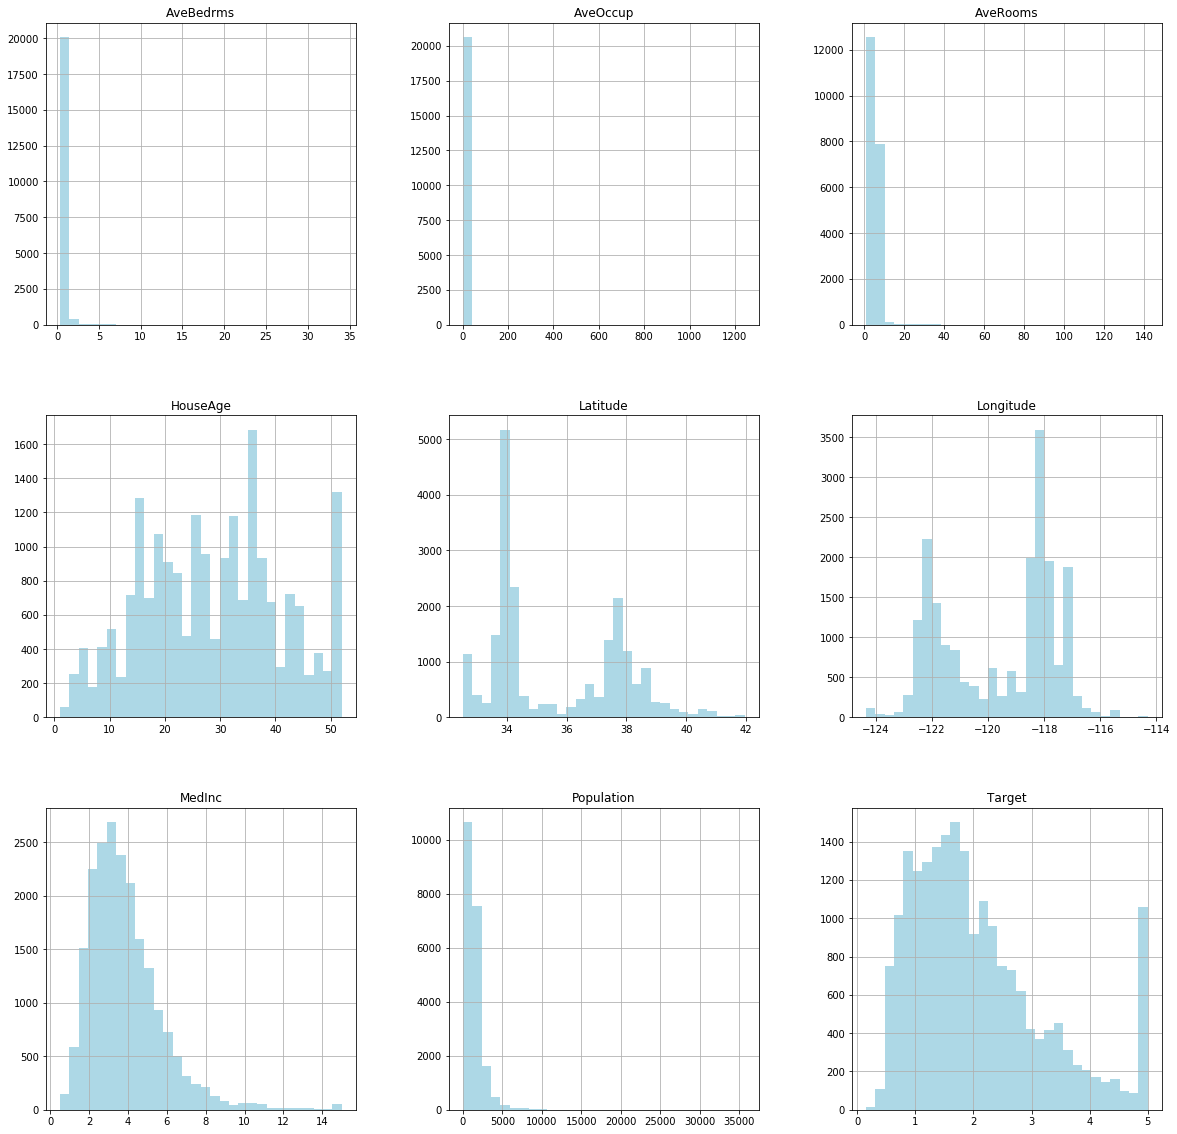

In [17]:
 #Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(3,3),bins=30,color='lightblue') 

##### Right skewness is present...

Text(-2.575000000000003, 0.5, 'Count')

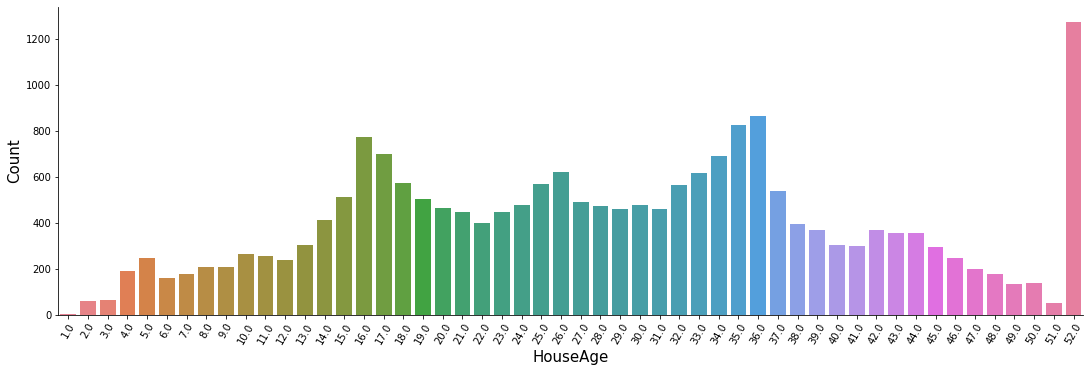

In [18]:
# Checking the number of houses of different ages... 
sns.catplot(x='HouseAge',kind='count',data=df,height=5,aspect=3,palette='husl')
plt.xticks(rotation=60,fontsize=10) 
plt.xlabel('HouseAge',fontsize=15)
plt.ylabel('Count',fontsize=15)

##### We can see that more number of houses are those who have age =52.

## Bivariate Analysis

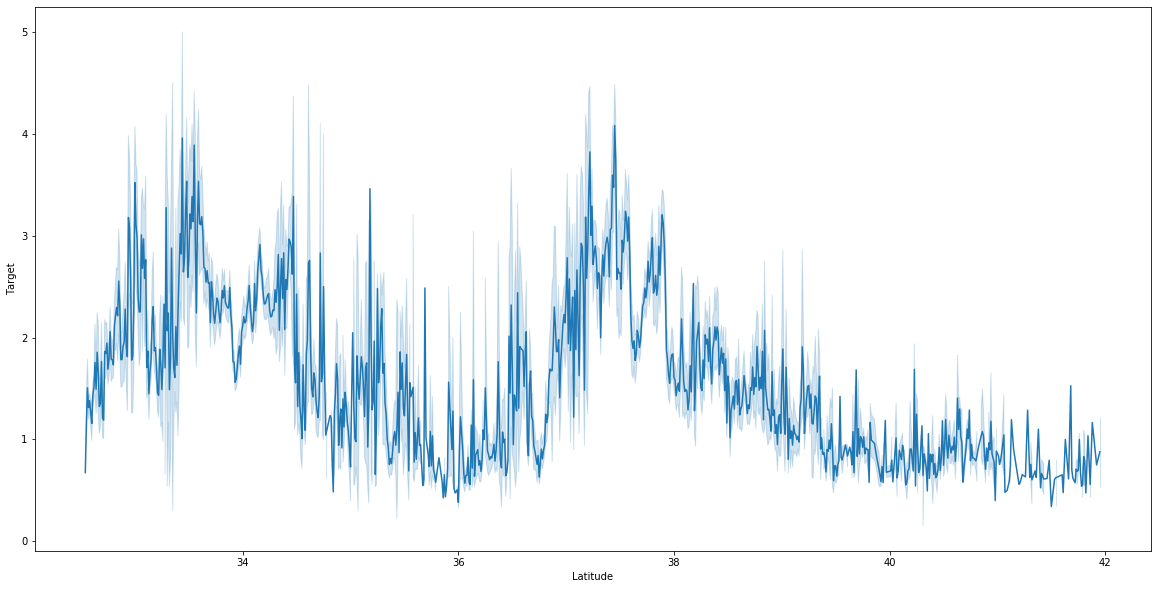

In [19]:
# Checking House Price with respect to the Latitude....
plt.figure(figsize=(20,10))
sns.lineplot(x='Latitude',y='Target',data=df,palette='husl')
plt.xlabel('Latitude',fontsize=15)
plt.ylabel('Median House Price',fontsize=15)

##### higher the latitude lesser the median_house_value

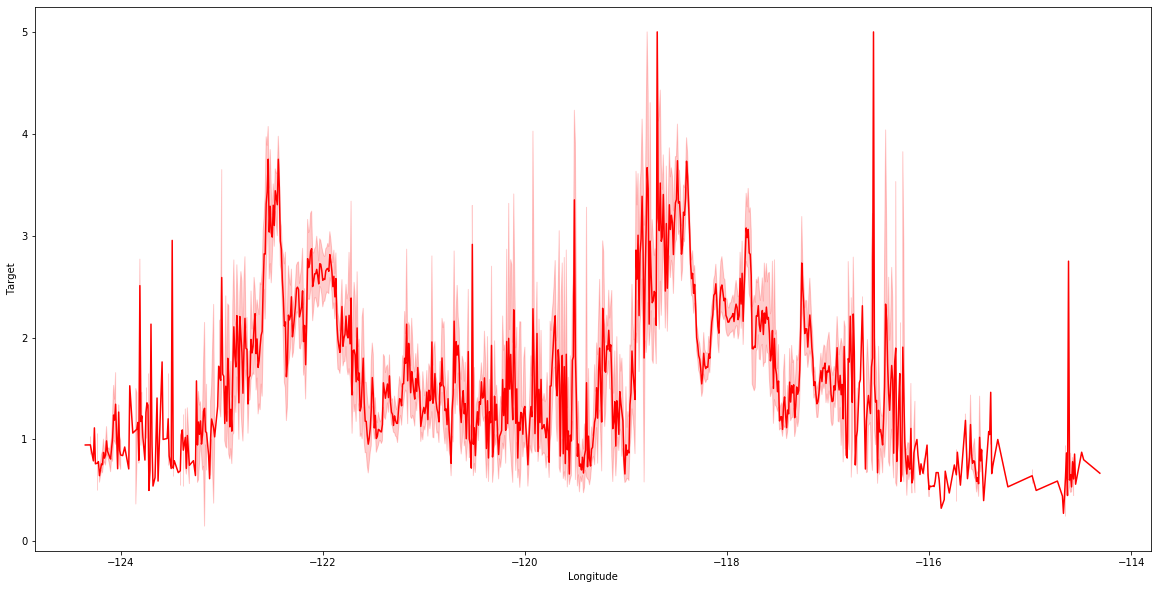

In [20]:
# Checking House Price with respect to the Longitude....
plt.figure(figsize=(20,10))
sns.lineplot(x='Longitude',y='Target',data=df,color='red')
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('Median House Price',fontsize=15)

##### As we move from longitude (-116) to (-118), house prices increases.

Text(6.674999999999997, 0.5, 'Median_house_value')

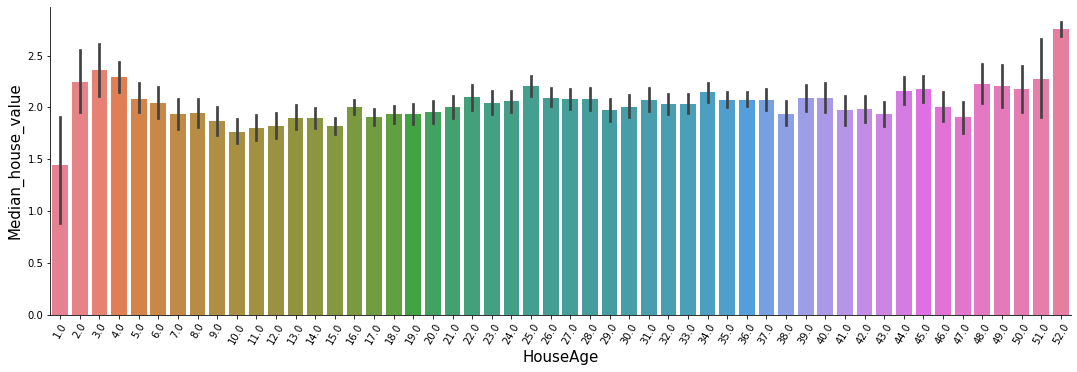

In [21]:
# Checking House Price with respect to the Age of the house
sns.catplot(x='HouseAge',y='Target',data=df,height=5,aspect=3,palette='husl',kind='bar')
plt.xticks(rotation=60,fontsize=10)
plt.xlabel('HouseAge',fontsize=15)
plt.ylabel('Median_house_value',fontsize=15)

Text(0, 0.5, 'Median_house_value')

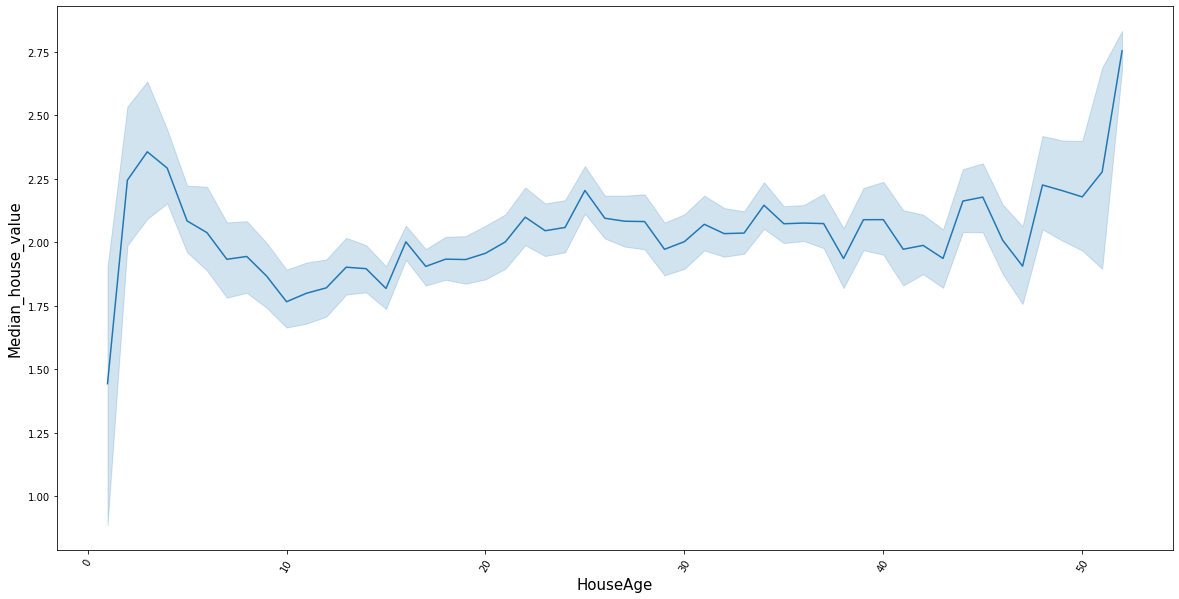

In [22]:
# Checking House Price with respect to the Age of the house
plt.figure(figsize=(20,10))
sns.lineplot(x='HouseAge',y='Target',data=df,palette='husl')
plt.xticks(rotation=60,fontsize=10)
plt.xlabel('HouseAge',fontsize=15)
plt.ylabel('Median_house_value',fontsize=15)

##### Conclusion: As the age of the house increses it's price also increases...

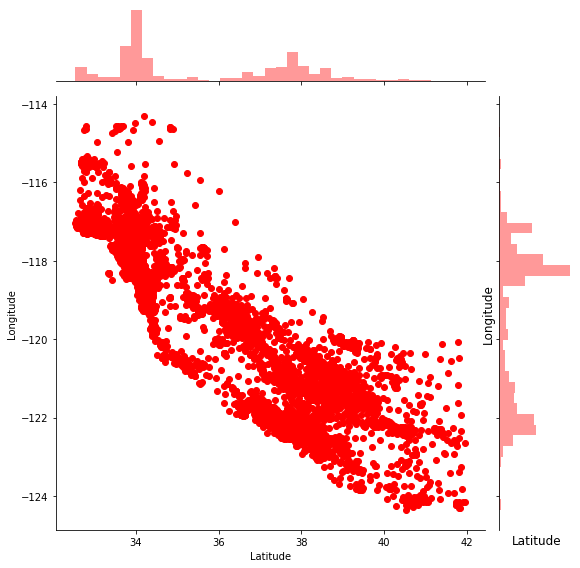

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [55]:
# Checking where the people lives more...
sns.jointplot(x='Latitude',y='Longitude',data=df,size=8,color='red')
plt.ylabel('Longitude',fontsize=12)
plt.xlabel('Latitude',fontsize=12)
plt.show()
sns.despine

##### For latitude between 32 and 40 there are many houses , which would mean that maybe it’s an ideal location . But when we talk about longitude we can see that concentration is high between -118 to -122.4. Which would mean that most of the buy’s has been for this particular location

<Figure size 432x288 with 0 Axes>

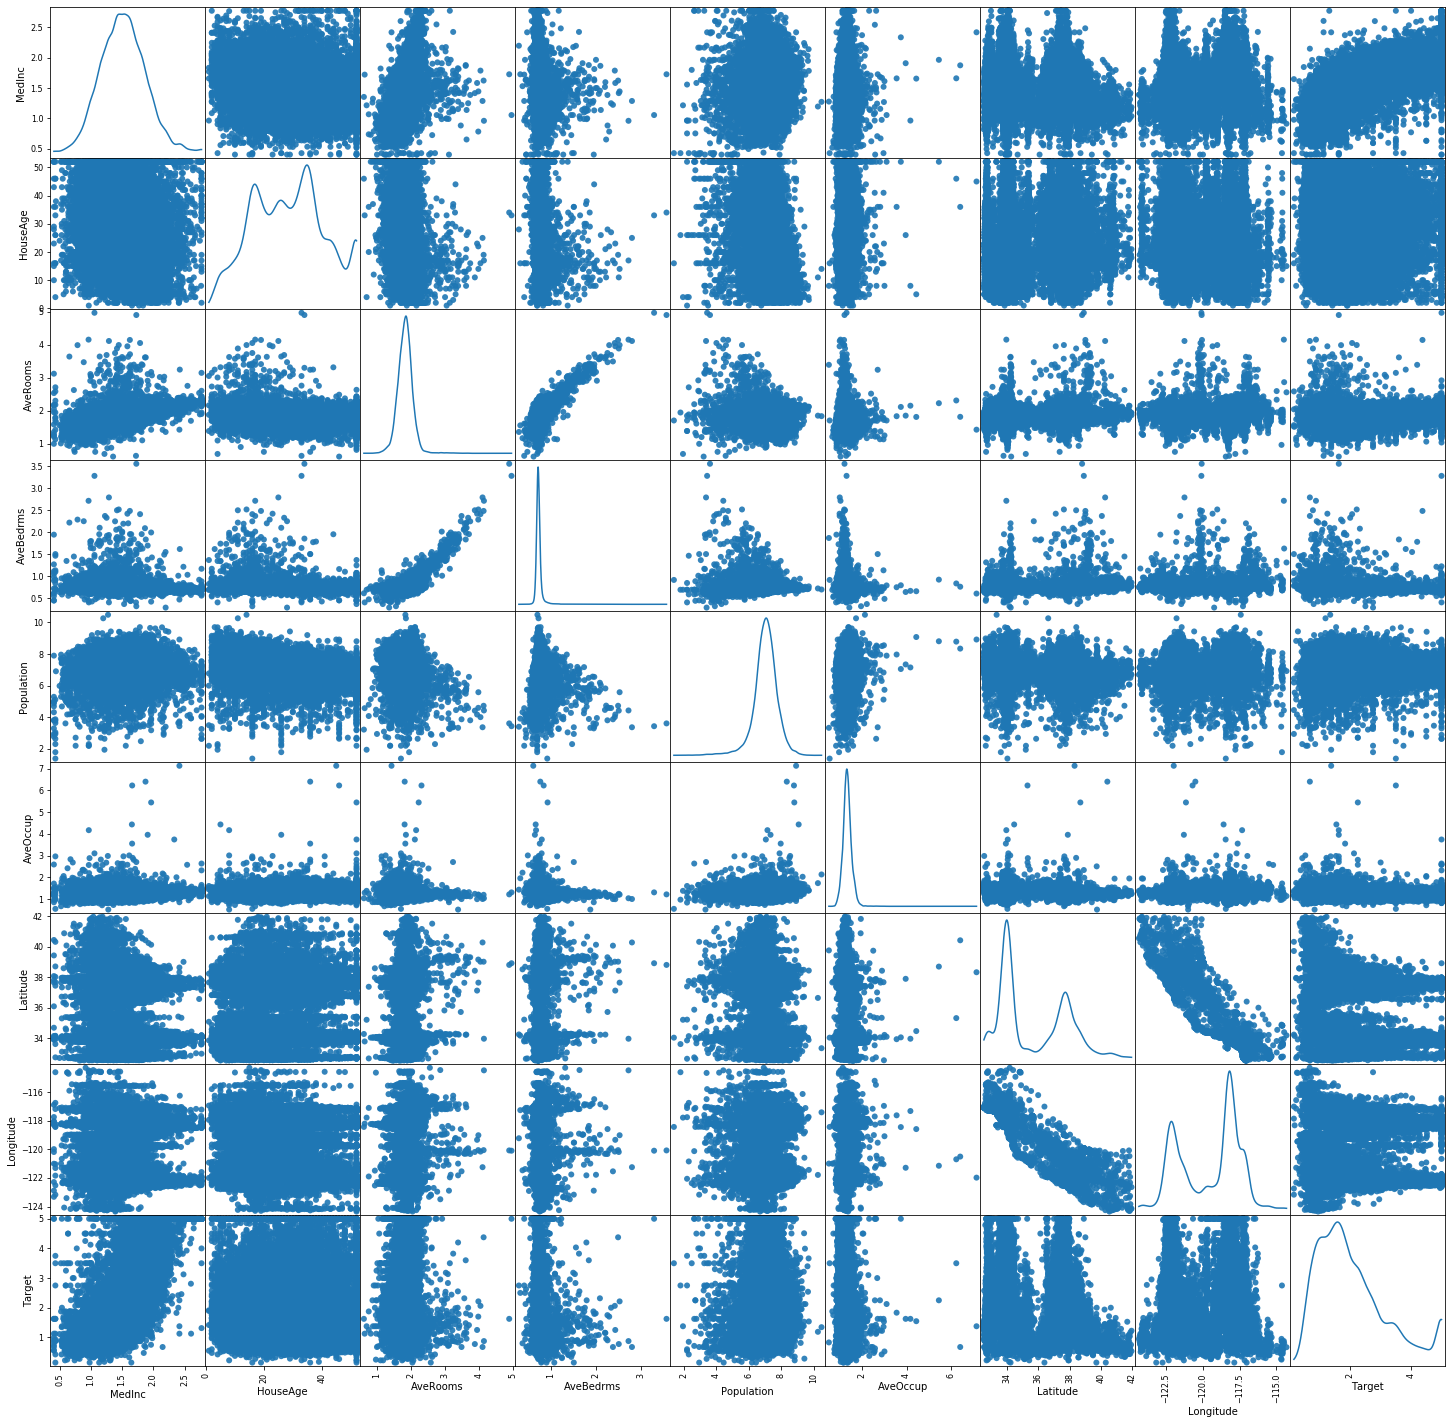

In [56]:
#plottig scatter matrix
from pandas.plotting import scatter_matrix
fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

In [25]:
# Checking Skewness....
df.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
Target         0.977763
dtype: float64

In [26]:
# Removing Skewness
for i in df.drop(['Target'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [27]:
# Checking Skewness again....
df.skew()

MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
Target        0.977763
dtype: float64

In [28]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(20640, 9)
(19876, 9)


In [29]:
# Checking Skewness again....
df_new.skew()

MedInc        0.127865
HouseAge      0.049873
AveRooms     -0.221664
AveBedrms     1.887048
Population   -0.137146
AveOccup      0.214699
Latitude      0.469818
Longitude    -0.307596
Target        0.970935
dtype: float64

In [30]:
# Checking the correlation
df_new.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1,-0.15,0.67,-0.22,0.022,-0.071,-0.086,-0.014,0.67
HouseAge,-0.15,1,-0.21,-0.12,-0.3,-0.019,0.014,-0.1,0.1
AveRooms,0.67,-0.21,1,0.15,-0.071,0.0077,0.14,-0.093,0.3
AveBedrms,-0.22,-0.12,0.15,1,-0.035,-0.13,0.067,-0.00098,-0.086
Population,0.022,-0.3,-0.071,-0.035,1,0.22,-0.13,0.12,-0.033
AveOccup,-0.071,-0.019,0.0077,-0.13,0.22,1,-0.16,0.18,-0.3
Latitude,-0.086,0.014,0.14,0.067,-0.13,-0.16,1,-0.93,-0.14
Longitude,-0.014,-0.1,-0.093,-0.00098,0.12,0.18,-0.93,1,-0.045
Target,0.67,0.1,0.3,-0.086,-0.033,-0.3,-0.14,-0.045,1


In [31]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['Target'],axis=1)
x1
print(x1.shape)

(19876, 8)


In [32]:
# Setting up the Target value in variable y.
y=df_new['Target']
y.shape

(19876,)

In [33]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.074064,0.981682,1.363435,-0.374067,-2.064766,-0.445172,1.061436,-1.326193
1,2.066673,-0.619492,0.849456,-0.921058,1.128584,-1.194170,1.052047,-1.321191
2,1.722361,1.862328,2.156123,0.135815,-1.378895,-0.070033,1.047352,-1.331194
3,1.093254,1.862328,0.535630,0.131887,-1.191790,-0.457155,1.047352,-1.336196
4,0.181152,1.862328,0.881007,0.213156,-1.171983,-1.066835,1.047352,-1.336196
...,...,...,...,...,...,...,...,...
19871,-1.664172,-0.299258,-0.094006,0.734984,-0.532288,-0.437235,1.812613,-0.755970
19872,-0.713453,-0.859669,0.758837,2.461876,-1.905475,0.382581,1.817307,-0.815993
19873,-1.510526,-0.939727,0.042942,0.603970,-0.253437,-0.819005,1.789138,-0.820995
19874,-1.336760,-0.859669,0.146587,1.112196,-0.741055,-1.170185,1.789138,-0.871015


# Model Training

In [34]:
#...........Function for GridSearch........
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(mod,parameters,scoring='r2' ,cv=5)
    clf.fit(x,y)
    print(clf.best_params_)

In [35]:
#.......Grid Search for SVR......
SV=SVR()
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters={'C': Cs, 'gamma' : gammas}
grid_cv(SV,parameters)

{'C': 1, 'gamma': 0.1}


In [36]:
#........Grid Search for KNeighborsRegressor......
knr=KNeighborsRegressor()
parameters={"n_neighbors":np.arange(1,100)}
grid_cv(knr,parameters)

{'n_neighbors': 16}


In [37]:
#...........Grid Search for Lasso.......
ls=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
grid_cv(ls,parameters)

{'alpha': 0.001}


In [38]:
#..............Grid Search for GradientBoostingRegressor...............
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbr,parameters)

{'learning_rate': 0.1, 'n_estimators': 500}


In [39]:
#.................Grid Search for RandomForestRegressor..........
rf=RandomForestRegressor()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters)

{'max_features': 'auto', 'n_estimators': 200}


In [40]:
#.......Gridsearchcv for Ada Boost Regressor...........
ada=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(ada,parameters,)

{'learning_rate': 0.01, 'n_estimators': 500}


In [41]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor(n_neighbors=16)
SV=SVR(C=1,gamma=0.1)
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor(max_features='auto',n_estimators=500)
GBR=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
ABR=AdaBoostRegressor(learning_rate=1,n_estimators=10)
LS=Lasso(alpha=0.001)
RD=Ridge()
EN=ElasticNet()

In [42]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))

In [43]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [44]:
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error : ',mse )
    MSE.append(mse*100)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',rmse )
    RMSE.append(rmse*100)
    print('\n')

*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='uniform')


max r2 score corresponding to 83 is: 0.7508989847776744
Learning Score :  0.7589191174134687
R2 Score :  0.7508989847776744


Cross Val Score :  0.5677102725201001


Mean Squared Error :  0.322146516001254


Root Mean Squared Error :  0.5675795239446663


*************************** SVR *****************************


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 83 is: 0.7942856870479734
Learning Score :  0.7838452420275378
R2 Score :  0.7942856870479734


Cross Val Score :  0.6848853580003593


Mean Squared Error :  0.2660372505906494


Root Mean Squared Error :  0.5157879899635599


***********

In [53]:
#............. DataFrame to show all the calculated scores at one place........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE})  
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,R2_score,Cross_Val_Score,Mean_squared_error,Root_Mean_squared_error
0,KNeighborsRegressor,75.8919,75.0899,56.771,32.2147,56.758
1,SVR,78.3845,79.4286,68.4885,26.6037,51.5788
2,LinearRegression,64.3353,66.7674,55.4464,44.3825,66.6202
3,DecisionTreeRegressor,100,65.8882,24.8524,45.5157,67.4653
4,RandomForestRegressor,97.407,82.8614,62.3406,22.1642,47.0789
5,GradientBoostingRegressor,87.928,84.924,67.0619,19.6868,44.3698
6,AdaBoostRegressor,59.8519,60.1073,38.4721,53.9287,73.4362
7,Lasso,64.3326,66.7615,55.4441,44.3904,66.6261
8,Ridge,64.3353,66.7671,55.4468,44.3829,66.6205
9,ElasticNet,18.2402,18.9038,-1.59414,101.969,100.98


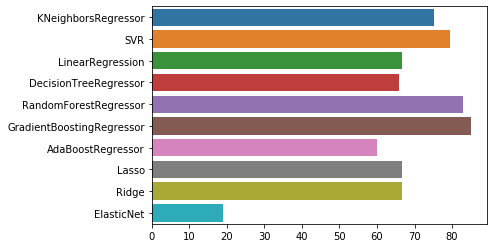

In [46]:
# ..........visualisation of Accuracy Score using Bar Plot..........
sns.barplot(y=Model,x=R2_score)

## After all this process conclusion is that GradientBoostingRegressor is performing better than rest,  along with the r2_score it's error is better among all...

In [47]:
# Using GradientBoostingRegressor for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=67,test_size=.30,)
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
gbrpred=gbr.predict(x_test)
print('R2 Score : ',r2_score(y_test,gbrpred))
print('Mean Squarred Error : ',mean_squared_error(y_test,gbrpred))
print('Root Mean Squarred Error : ',np.sqrt(mean_squared_error(y_test,gbrpred))) 

R2 Score :  0.849118744779239
Mean Squarred Error :  0.19702643164551423
Root Mean Squarred Error :  0.4438765950638919


In [48]:
# Printing predicted values
test=pd.DataFrame(data=y_test)
test['Predicted values']=gbrpred
test

,Target,Predicted values
1888,0.896,0.904022
20503,3.300,4.156428
12089,1.613,2.073108
47,1.375,1.318835
19984,0.638,1.130366
...,...,...
13294,1.304,1.438723
14749,1.276,1.565821
18891,1.415,1.767290
13825,0.648,0.570777


In [49]:
# Saving the Predicted values in csv file
test.to_csv('Project_13_California_housing.csv',index=False) 

In [50]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(gbr,'Project_13_California_housing.pkl')

['Project_13_California_housing.pkl']

In [51]:
# Loading predicted values.
final=joblib.load('Project_13_California_housing.pkl')
final.predict(x_test)

array([0.90402209, 4.15642764, 2.07310753, ..., 1.76728955, 0.57077738,
       3.44595997])

## Conclusion:                  
1) We can see that more number of houses are those who have age =52.                
2) higher the latitude lesser the median_house_value                   
3) As we move from longitude (-116) to (-118), house prices increases.            
4) As the age of the house increses it's price also increases...                
5) For latitude between 32 and 40 there are many houses , which would mean that maybe it’s an ideal location . But when we talk about longitude we can see that concentration is high between -118 to -122.4. Which would mean that most of the buy’s has been for this particular location.                    
 
## Steps Followed:             
1) Understanding Data.              
2) EDA Analysis.                            
3) Best parameters are found using Gridsearch cv and applied to models.                      
4) Best parameters are applied to each models and machine is trained for each models to find Best R2 Score, Cross val score, mean squared error and root mean square error.                                       
5) A Result table is made comprises of r2, cross_val score, mean squared error and root mean square error of each model.    
6) GradientBoostingRegressor is used to train the model finally as it's r2_score is best and error is less among the rest of the models.                                  
7) Predicted values are saved in Project_13_California_housing.csv file.            
8) Pickle file is named with Project_13_California_housing.pkl file                   